<a href="https://colab.research.google.com/github/koushikmj/mitophagy-immune-infiltration-vitiligo-bioinf/blob/main/BINF6310_final_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Summary of the Paper
The study titled "Mitophagy and Immune Infiltration in Vitiligo: Evidence from Bioinformatics Analysis" explores the role of mitophagy (mitochondrial autophagy) and immune infiltration in the progression of vitiligo, an autoimmune depigmented skin disease. The researchers aimed to identify biomarkers and therapeutic targets by analyzing gene expression data from vitiligo lesions.


#### 1. Data Collection
Gene Expression Data:

Use public repositories like the Gene Expression Omnibus (GEO) or ArrayExpress to obtain microarray or RNA-seq datasets for your study.
Ensure datasets include both experimental (e.g., disease) and control groups.
Examples: GSE53146 and GSE75819 were used in this paper.
Target Gene Sets:

Download a set of genes related to your focus (e.g., mitophagy-related genes) from databases like KEGG or Reactome.

In [ ]:
# download file gene1, gene2
import pandas as pd
import requests
from io import StringIO
import gzip
import shutil

# List of links to download TSV files
links =  [   {"ID":'GSE53146',"Link":'https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE53146&format=file&file=GSE53146%5Fnon%5Fnormalized%5Fhuman%2Etxt%2Egz'},
          {"ID":'GSE75819',"Link":'https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE75819&format=file&file=GSE75819%5Fnon%2Dnormalized%2Etxt%2Egz'},
             {"ID":'ID_MAPPING',"Link":"https://github.com/Rtwick-George-Moses/bioinfo_project/raw/refs/heads/main/GPL14951-11332%20(3).txt.gz"},
          ]# List to store DataFrames
dataframes = []

# Download each file, load it into a DataFrame, and store it in the list
for record in links:
    try:
        response = requests.get(record["Link"])
        response.raise_for_status()  # Raise an error for HTTP issues
        # Read TSV file into a pandas DataFrame
        print(f"Downloading gene_{record['ID']} from {record['Link']}")
        file_name = f"gene_{record['ID']}.txt"

        gz_file = "temp_file.gz"
        with open(gz_file, "wb") as f:
            f.write(response.content)

        # Decompress the .gz file and save as .txt
        with gzip.open(gz_file, "rt") as gz:
            with open(file_name, "w") as txt:
                shutil.copyfileobj(gz, txt)

        print(f"Successfully loaded gene_{record['ID']}")
    except requests.exceptions.RequestException as e:
        print(f"Failed to download or load gene_{record['ID']} from {record['Link']}: {e}")

# Open the file in read mode
with open('gene_GSE75819.txt', 'r') as file:
    lines = file.readlines()

# Write the lines, skipping the first 5
with open('gene_GSE75819.txt', 'w') as file:
    file.writelines(lines[5:])

# Open the file in read mode
with open('gene_ID_MAPPING.txt', 'r') as file:
    lines = file.readlines()

# Write the lines, skipping the first 5
with open('gene_ID_MAPPING.txt', 'w') as file:
    file.writelines(lines[28:])


Successfully loaded gene_GSE53146
Successfully loaded gene_GSE75819
Successfully loaded gene_ID_MAPPING


In [ ]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('gene_GSE75819.txt', sep='\t')
df2 = pd.read_csv('gene_GSE53146.txt', sep='\t')
df3 = pd.read_csv('gene_ID_MAPPING.txt', sep='\t')

#selecting ID, ILMN_Gene
df3 = df3[["ID","ILMN_Gene"]]




#print(df1.shape,df2.shape,df3.shape)
# Add '_AVG' suffix to the first column name
df1.columns.values[0] = df1.columns.values[0] + '_AVG'
df2.columns.values[0] = df2.columns.values[0] + '_AVG'
df3.columns.values[0] = df3.columns.values[0] + '_AVG'

df3['ILMN_Gene'] = df3['ILMN_Gene'].astype('str')


# Combining Df2 and DF3 on
df2 = pd.merge(df2, df3,left_on="ID_REF_AVG", right_on="ID_AVG", how='inner')

df2.to_csv("Mapped_Dataset2.csv")


df2['ILMN_Gene']=df2['ILMN_Gene'].astype('str')

# Drop rows with any null values
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()


# Drop duplicates from both DataFrames
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()

#print(df1.columns,df2.columns)

#df1["Batch"] = "GSE75819"
#df2["Batch"] = "GSE53146"

df1['ILMN_Gene'] = df1['TargetID'].astype(str)

# Perform an outer join on the DataFrames (assuming you are joining on a common column)
merged_df = pd.concat([df1, df2],axis=1,join='outer')

#print(merged_df.head())


#merged_df = merged_df.drop_duplicates().dropna()

# # # Remove columns that don't have 'avg' in their name
# df1 = df1.loc[:, df1.columns.str.contains('AVG')]
merged_df_2 = merged_df.loc[:, merged_df.columns.str.contains('TargetID')]
merged_df_1 = merged_df.loc[:, merged_df.columns.str.contains('AVG_Signal')]



merged_df = pd.concat([merged_df_2,merged_df_1],axis=1)

merged_df = merged_df.drop_duplicates().dropna()

merged_df['TargetID'] = merged_df['TargetID'].str.strip()

merged_df.to_csv("merged_gene_file_test.csv")

#print(merged_df.sort_values(by ='TargetID').head(5))

# Create an empty list to store results
mean_list = []

# Get the unique TargetID values
unique_ids = merged_df['TargetID'].unique()
print('1-Dec' in unique_ids.tolist())

merged_df['VD13V.AVG_Signal'] = merged_df['VD13V.AVG_Signal'].astype('float64')
print(merged_df['VD13V.AVG_Signal'])
print(merged_df.dtypes)

# Iterate over unique TargetID values
for target_id in unique_ids:
    # Filter rows for the current TargetID
    group = merged_df[merged_df['TargetID'] == target_id]
    # Calculate the mean for numeric columns
    mean_values = group.mean(numeric_only=True)
    # Add the alphanumeric TargetID back to the result
    mean_values['TargetID'] = target_id
    # Append the result to the list
    mean_list.append(mean_values)

# Create a new DataFrame from the list of mean values
merged_df = pd.DataFrame(mean_list)
#print(merged_df.head)
# Reorder columns so TargetID appears first
merged_df = merged_df[['TargetID'] + [col for col in merged_df.columns if col != 'TargetID']]
#print(merged_df.head)
#print(merged_df.sort_values(by ='TargetID').head(5))

# Group by TargetID and calculate the mean for numeric columns
# merged_df = merged_df.groupby('TargetID').agg(lambda x: x.mean() if x.dtype in [np.float64, np.int64] else x).reset_index()

# # # Remove columns that don't have 'avg' in their name
# df1 = df1.loc[:, df1.columns.str.contains('AVG')]
#*AVG_Signal, Target_ID
# Save the result to a new TSV file


merged_df.to_csv('merged_gene_file.csv', sep=',', index=False)






<ipython-input-3-b25c99a3b4f2>:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('gene_GSE75819.txt', sep='\t')


True
0        27246.040000
1         4792.797000
2           28.558759
3           34.587432
4           29.916868
             ...     
29372       28.050147
29373       23.538834
29374       24.316442
29375    12261.620000
29376       23.646365
Name: VD13V.AVG_Signal, Length: 29377, dtype: float64
TargetID             object
VD13N.AVG_Signal    float64
VD13V.AVG_Signal    float64
VD18N.AVG_Signal    float64
VD18V.AVG_Signal    float64
VD19N.AVG_Signal    float64
VD19V.AVG_Signal    float64
VD20N.AVG_Signal    float64
VD20V.AVG_Signal    float64
VD23N.AVG_Signal    float64
VD23V.AVG_Signal    float64
VD24N.AVG_Signal    float64
VD24V.AVG_Signal    float64
VD22N.AVG_Signal    float64
VD22V.AVG_Signal    float64
VD32N.AVG_Signal    float64
VD32V.AVG_Signal    float64
VD33N.AVG_Signal    float64
VD33V.AVG_Signal    float64
VD37N.AVG_Signal    float64
VD37V.AVG_Signal    float64
VD39N.AVG_Signal    float64
VD39V.AVG_Signal    float64
VD38N.AVG_Signal    float64
VD38V.AVG_Signal    float64

In [ ]:
metadata_df_1 = pd.DataFrame()
metadata_df_1["sample"] = df1.columns
metadata_df_1['batch'] = "GSE75819"

metadata_df_2 = pd.DataFrame()
metadata_df_2["sample"] = df2.columns
metadata_df_2['batch'] = "GSE53146"

metadata_df = pd.concat([metadata_df_1,metadata_df_2])

metadata_df = metadata_df[metadata_df['sample'].str.contains('AVG_Signal')]

metadata_df.to_csv('metadata.csv', index=False)

In [ ]:
print(metadata_df.shape)
print(merged_df.shape)


(40, 2)
(24053, 41)


In [ ]:
list(set(metadata_df['sample']) - set(merged_df.columns))

[]

# Make the Runtime R

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'BiocVersion', 'limma'

also installing the dependency ‘statmod’


Old packages: 'httr2', 'later', 'promises', 'usethis'



Checking if expression_data columns are numeric:
Checking for missing values in expression_data...
Removing batch effects using limma...
Inspecting batch-corrected data:


,VD13N.AVG_Signal,VD13V.AVG_Signal,VD18N.AVG_Signal,VD18V.AVG_Signal,VD19N.AVG_Signal,VD19V.AVG_Signal,VD20N.AVG_Signal,VD20V.AVG_Signal,VD23N.AVG_Signal,VD23V.AVG_Signal,⋯,c.7.AVG_Signal,c.8.AVG_Signal,c.9.AVG_Signal,c.10.AVG_Signal,c.11.AVG_Signal,v.1.AVG_Signal,v.2.AVG_Signal,v.3.AVG_Signal,v.4.AVG_Signal,v.5.AVG_Signal
EEF1A1,14480.3992,17821.8292,17531.8242,16611.3142,20324.3442,16618.6242,22631.1892,24898.9992,19461.7042,19886.6292,⋯,15577.59518,16966.55163,34865.43648,45531.28,24574.81873,11795.902533,15092.96733,10340.2598,15247.3655,11496.3343
GAPDH,5842.6254,3272.7994,7015.2854,4090.8149,7653.0414,3069.8349,9769.3364,3968.4399,4430.2094,3005.8249,⋯,2393.47213,78.88403,15138.88413,28856.46,3344.91658,1306.934884,2675.95013,522.7992,4025.3276,770.9730
LOC643334,5987.8397,5990.3285,5993.6962,5990.4332,5987.0727,5994.4725,5984.1871,6001.7861,5991.8685,5986.9321,⋯,-4770.48375,4991.40025,24735.82025,53442.37,5092.74025,-5843.162650,-1970.39875,-5829.9264,-4705.3177,-4749.9117
SLC35E2,793.1907,787.7038,801.5301,803.9837,808.3150,790.7165,778.5118,787.7991,781.5408,788.5668,⋯,-657.52129,-530.83420,-644.69120,13994.04,-624.27730,-654.661614,-654.86023,-650.4553,-648.1548,-511.1529
DUSP22,2744.6462,2415.0498,2656.0171,2396.6023,2664.3260,2341.3375,2897.0761,2449.9956,2660.3561,2430.8265,⋯,883.34403,180.55387,-148.81318,13162.99,613.90025,-137.701669,6470.46335,540.4784,4687.8153,577.6305
LOC642820,109.6082,114.6670,114.8296,110.5616,107.8615,107.8733,112.9883,110.2036,109.3142,105.8630,⋯,21.17936,131.00534,30.72354,314.53,33.84394,8.618146,19.96174,119.5859,582.4692,346.7948


Saving batch-corrected expression data...
Performing PCA on batch-corrected expression data...
Variance explained by each principal component:


Importance of components:
                           PC1     PC2     PC3      PC4      PC5      PC6
Standard deviation     96.7703 66.3497 47.2716 41.84985 35.86452 30.89001
Proportion of Variance  0.3893  0.1830  0.0929  0.07281  0.05348  0.03967
Cumulative Proportion   0.3893  0.5724  0.6653  0.73807  0.79155  0.83122
                            PC7      PC8      PC9     PC10     PC11    PC12
Standard deviation     26.74086 26.28048 24.76255 22.18018 19.13094 17.6850
Proportion of Variance  0.02973  0.02871  0.02549  0.02045  0.01522  0.0130
Cumulative Proportion   0.86095  0.88966  0.91515  0.93561  0.95082  0.9638
                           PC13    PC14    PC15    PC16    PC17    PC18    PC19
Standard deviation     14.97859 9.58025 8.34113 7.29238 6.86299 6.63950 6.28668
Proportion of Variance  0.00933 0.00382 0.00289 0.00221 0.00196 0.00183 0.00164
Cumulative Proportion   0.97315 0.97697 0.97986 0.98207 0.98403 0.98586 0.98751
                          PC20    PC21    PC22    PC23

Plotting PCA results...


Saving 7 x 7 in image


Script completed successfully!


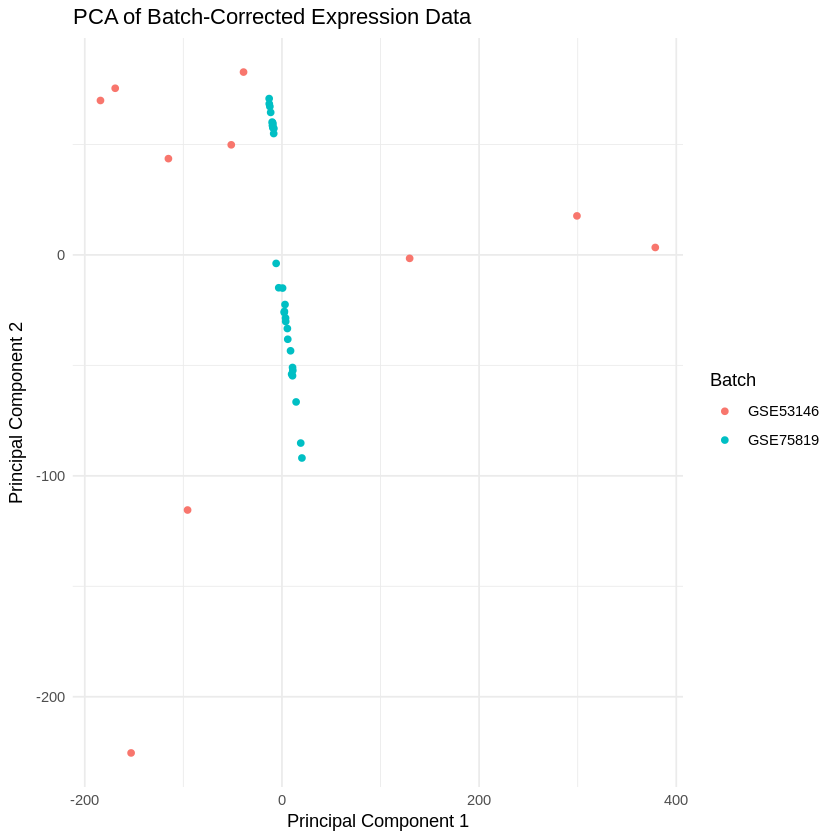

In [ ]:
# Install necessary packages if not already installed
if (!requireNamespace("BiocManager", quietly = TRUE)) {
  install.packages("BiocManager")
}
BiocManager::install("limma")

# Load necessary library
library(limma)

# Load your expression data and metadata
expression_data <- read.csv("merged_gene_file.csv", row.names = 1)  # Replace with your file path
metadata <- read.csv("metadata.csv")  # Replace with your file path

# Ensure expression data is numeric
cat("Checking if expression_data columns are numeric:\n")
if (any(!sapply(expression_data, is.numeric))) {
  cat("Converting non-numeric columns to numeric...\n")
  expression_data <- apply(expression_data, 2, as.numeric)  # Convert all columns to numeric
}

# Check for missing values and handle them
cat("Checking for missing values in expression_data...\n")
if (sum(is.na(expression_data)) > 0) {
  cat("Missing values found. Handling missing data...\n")
  expression_data <- expression_data[complete.cases(expression_data), ]
  metadata <- metadata[complete.cases(expression_data), ]  # Ensure metadata matches
}

# Check that the number of rows in metadata matches the number of columns in expression_data
if (nrow(metadata) != ncol(expression_data)) {
  stop("Number of rows in 'metadata' does not match the number of columns in 'expression_data'. Please check your data.")
}

# Convert batch variable in metadata to a factor
metadata$batch <- as.factor(metadata$batch)

# Remove batch effects using limma
cat("Removing batch effects using limma...\n")
batch_corrected <- removeBatchEffect(expression_data, batch = metadata$batch)

# Check the batch-corrected data
cat("Inspecting batch-corrected data:\n")
head(batch_corrected)

# Save corrected data to CSV
cat("Saving batch-corrected expression data...\n")
write.csv(batch_corrected, "batch_corrected_expression.csv")

# PCA analysis on the batch-corrected data
cat("Performing PCA on batch-corrected expression data...\n")
pca_result <- prcomp(t(batch_corrected), scale. = TRUE)

# Variance explained by each principal component
cat("Variance explained by each principal component:\n")
summary(pca_result)

# Plot PCA - First two principal components
cat("Plotting PCA results...\n")
pca_data <- data.frame(PC1 = pca_result$x[, 1], PC2 = pca_result$x[, 2], Batch = metadata$batch)
library(ggplot2)

ggplot(pca_data, aes(x = PC1, y = PC2, color = Batch)) +
  geom_point() +
  labs(title = "PCA of Batch-Corrected Expression Data",
       x = "Principal Component 1",
       y = "Principal Component 2") +
  theme_minimal()

# Save PCA plot
ggsave("PCA_plot.png")

cat("Script completed successfully!\n")


In [ ]:
# Check the structure of expression_data
str(expression_data)
class(expression_data)

# If expression_data is a list, convert it to a data.frame or matrix
if (class(expression_data) == "list") {
  expression_data <- as.data.frame(expression_data)
}

# Convert to matrix if it's not already
expression_data <- as.matrix(expression_data)

# Check for NA or infinite values
sum(is.na(expression_data))  # Count NAs
sum(is.infinite(expression_data))  # Count infinite values

# Remove rows/columns with NAs or infinite values
expression_data <- expression_data[complete.cases(expression_data), ]
expression_data <- expression_data[!apply(is.infinite(expression_data), 1, any), ]

# Now normalize using preprocessCore (or limma as a fallback)
library(preprocessCore)
normalized_expression_data <- normalize.quantiles(as.matrix(expression_data))

# Alternatively, using limma's normalizeBetweenArrays
library(limma)
normalized_expre


'data.frame':	24053 obs. of  40 variables:
 $ VD13N.AVG_Signal: num  24626 5727.1 26.1 40.1 1492.2 ...
 $ VD13V.AVG_Signal: num  27967.4 3157.3 28.6 34.6 1162.6 ...
 $ VD18N.AVG_Signal: num  27677.4 6899.7 31.9 48.4 1403.6 ...
 $ VD18V.AVG_Signal: num  26756.9 3975.3 28.7 50.9 1144.2 ...
 $ VD19N.AVG_Signal: num  30469.9 7537.5 25.3 55.2 1411.9 ...
 $ VD19V.AVG_Signal: num  26764.2 2954.3 32.7 37.6 1088.9 ...
 $ VD20N.AVG_Signal: num  32776.8 9653.8 22.4 25.4 1644.6 ...
 $ VD20V.AVG_Signal: num  35044.6 3852.9 40 34.7 1197.5 ...
 $ VD23N.AVG_Signal: num  29607.3 4314.7 30.1 28.4 1407.9 ...
 $ VD23V.AVG_Signal: num  30032.2 2890.3 25.2 35.5 1178.4 ...
 $ VD24N.AVG_Signal: num  27332.3 5644.6 30.7 33.6 1240.5 ...
 $ VD24V.AVG_Signal: num  22242.8 4256.9 28.9 32.8 1245.8 ...
 $ VD22N.AVG_Signal: num  32626 9685 113 111 1613 ...
 $ VD22V.AVG_Signal: num  28600 3693 101 102 953 ...
 $ VD32N.AVG_Signal: num  29663 6238 109 115 1498 ...
 $ VD32V.AVG_Signal: num  29348 6811 104 111 1384 ...
 $

[1] "data.frame"

[1] 0

[1] 0

ERROR: Error in normalize.quantiles(as.matrix(expression_data)): ERROR; return code from pthread_create() is 22



In [ ]:
# Load necessary libraries
if (!requireNamespace("BiocManager", quietly = TRUE)) {
  install.packages("BiocManager")
}
BiocManager::install(c("limma", "sva"))

library(limma)
library(sva)

# Load your expression data and metadata
expression_data <- read.csv("merged_gene_file.csv", row.names = 1)  # Replace with your file path
metadata <- read.csv("metadata.csv")  # Replace with your file path

# Convert metadata columns to factors
metadata$batch <- as.factor(metadata$batch)

# Ensure expression data is numeric
cat("Checking if expression_data columns are numeric:\n")
if (any(!sapply(expression_data, is.numeric))) {
  cat("Converting non-numeric columns to numeric...\n")
  expression_data <- apply(expression_data, 2, as.numeric)  # Convert all columns to numeric
}

# Check for missing values and handle them
cat("Checking for missing values in expression_data...\n")
if (sum(is.na(expression_data)) > 0) {
  cat("Missing values found. Handling missing data...\n")
  expression_data <- expression_data[complete.cases(expression_data), ]
  metadata <- metadata[complete.cases(expression_data), ]  # Ensure metadata matches
}

# Check that the number of rows in metadata matches the number of columns in expression_data
if (nrow(metadata) != ncol(expression_data)) {
  stop("Number of rows in 'metadata' does not match the number of columns in 'expression_data'. Please check your data.")
}

# Define the model matrices 'mod' (full model) and 'mod0' (null model)
# Assuming that 'batch' is the batch variable, and you can add other factors like 'Condition' if needed
mod <- model.matrix(~ batch, data = metadata)  # Adjust as needed for other factors
mod0 <- model.matrix(~ 1, data = metadata)  # Null model

# Double check for missing values in design matrices
cat("Checking if 'mod' design matrix contains missing values...\n")
if (any(is.na(mod))) stop("The 'mod' design matrix contains missing values.")

cat("Checking if 'mod0' design matrix contains missing values...\n")
if (any(is.na(mod0))) stop("The 'mod0' design matrix contains missing values.")

# Check for missing values in surrogate variables (which will be generated later)
cat("Checking if surrogate variables contain missing values...\n")
# Note: This check will happen after running the SVA analysis

# Check for missing values in the 'batch' variable
cat("Checking if 'batch' variable contains missing values...\n")
if (any(is.na(metadata$batch))) stop("The 'batch' variable contains missing values.")

# Adjusting the number of iterations for sva
cat("Running SVA with adjusted parameters...\n")
svobj <- sva(as.matrix(expression_data), mod, mod0, n.sv = 2, B = 50)

# Double check for missing values in surrogate variables
cat("Checking if surrogate variables contain missing values...\n")
if (any(is.na(svobj$sv))) stop("Surrogate variables contain missing values.")

# Continue with further analysis after successful SVA
# Add surrogate variables to the design matrix
design_with_sva <- cbind(mod, svobj$sv)

# Remove batch effects using limma
cat("Fitting model with batch effects and surrogate variables...\n")
fit <- lmFit(expression_data, design_with_sva)
fit <- eBayes(fit)

# Extract batch-corrected expression values
batch_corrected <- removeBatchEffect(expression_data, batch = metadata$batch, covariates = svobj$sv, design = mod)

# Check the batch-corrected data
cat("Inspecting batch-corrected data:\n")
head(batch_corrected)

# Save corrected data to CSV
cat("Saving batch-corrected expression data...\n")
write.csv(batch_corrected, "batch_corrected_expression.csv")

cat("Script completed successfully!\n")


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'limma' 'sva'”


Checking if expression_data columns are numeric:
Checking for missing values in expression_data...
Checking if 'mod' design matrix contains missing values...
Checking if 'mod0' design matrix contains missing values...
Checking if surrogate variables contain missing values...
Checking if 'batch' variable contains missing values...
Running SVA with adjusted parameters...
Number of significant surrogate variables is:  2 
Iteration (out of 50 ):1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  Checking if surrogate variables contain missing values...
Fitting model with batch effects and surrogate variables...
Coefficients not estimable: batch1 


Warning message:
“Partial NA coefficients for 24053 probe(s)”


Inspecting batch-corrected data:


,VD13N.AVG_Signal,VD13V.AVG_Signal,VD18N.AVG_Signal,VD18V.AVG_Signal,VD19N.AVG_Signal,VD19V.AVG_Signal,VD20N.AVG_Signal,VD20V.AVG_Signal,VD23N.AVG_Signal,VD23V.AVG_Signal,⋯,c.7.AVG_Signal,c.8.AVG_Signal,c.9.AVG_Signal,c.10.AVG_Signal,c.11.AVG_Signal,v.1.AVG_Signal,v.2.AVG_Signal,v.3.AVG_Signal,v.4.AVG_Signal,v.5.AVG_Signal
EEF1A1,25912.53095,29267.03758,29014.47542,28075.29677,31813.76449,28059.05790,34103.35546,36372.36873,30885.47984,31328.73634,⋯,6104.1054,7102.8673,23042.2382,21655.3302,13438.2651,-262.89267,-8255.00962,-733.7225,-511.0196,567.3511
GAPDH,6879.16814,4320.72758,8100.48533,5157.36008,8744.15280,4113.04273,10843.49227,5042.26395,5457.73620,4050.57304,⋯,3086.2644,3369.7875,13583.2570,15634.0071,2435.0439,-465.02803,-9874.07922,-363.9255,-1257.8687,120.4699
LOC643334,2671.32011,2701.30777,2774.60784,2736.61186,2782.18545,2696.47276,2746.66023,2769.39010,2661.05794,2692.29439,⋯,2619.6235,6022.6289,27566.6451,33138.4291,9277.1890,-3486.64576,-21565.10181,-1454.8318,-9581.7804,-277.2197
SLC35E2,780.40676,782.50255,817.20937,809.26489,827.91630,782.84673,788.45198,798.68254,764.22113,781.65255,⋯,486.7403,-135.5786,-826.8949,7031.5576,-416.8450,-971.48545,-7349.04512,-401.1652,-3058.6219,-197.3513
DUSP22,2458.06684,2138.33064,2406.91334,2133.73922,2420.32394,2061.09254,2640.31961,2194.32895,2367.70608,2151.83236,⋯,2643.6382,1257.9815,-133.4866,4245.2428,1140.6445,-298.54131,-2077.31607,1118.5485,1775.7233,1250.4869
LOC642820,43.51011,48.68915,49.17643,44.74682,42.27055,41.85391,47.24674,44.47887,43.14659,39.85861,⋯,105.1808,199.1864,93.9707,271.8751,103.2031,69.74643,-18.72606,189.6507,610.7998,417.7344


Saving batch-corrected expression data...
Script completed successfully!


In [ ]:
# Function to install and load packages
install_and_load <- function(packages) {
  for (pkg in packages) {
    if (!requireNamespace(pkg, quietly = TRUE)) {
      install.packages(pkg)
    }
    library(pkg, character.only = TRUE)
  }
}

# Bioconductor package installer
install_bioconductor <- function(packages) {
  if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
  for (pkg in packages) {
    if (!requireNamespace(pkg, quietly = TRUE)) {
      BiocManager::install(pkg)
    }
    library(pkg, character.only = TRUE)
  }
}

# List of CRAN packages
cran_packages <- c("FactoMineR", "factoextra", "ggplot2", "preprocessCore")

# List of Bioconductor packages
bioc_packages <- c("sva", "limma")

# Install and load packages
install_and_load(cran_packages)
install_bioconductor(bioc_packages)
library(limma)
library(sva)
library(preprocessCore)
library(FactoMineR)
library(factoextra)
library(ggplot2)


# Load the merged dataset
# Replace "merged_data.csv" with your actual merged file path
merged_data <- read.csv("merged_gene_file.csv", row.names = 1)

# Normalize data using preprocessCore
normalized_data <- normalize.quantiles(as.matrix(merged_data))

# Perform batch effect removal
# Assume batch information is available as "batch" and "group" metadata
# Replace with your actual metadata files or values
batch <- as.factor(c(...))  # Provide the batch IDs
group <- as.factor(c(...))  # Provide the group labels (e.g., control vs vitiligo)

# Adjust for batch effects using ComBat from sva package
combat_data <- ComBat(dat = normalized_data, batch = batch, mod = model.matrix(~ group))

# Perform PCA
pca_res <- PCA(t(combat_data), graph = FALSE)
fviz_pca_ind(pca_res, geom = "point", col.ind = group, palette = "jco", addEllipses = TRUE)

# Identify DEGs using limma
design <- model.matrix(~ group)
fit <- lmFit(combat_data, design)
fit <- eBayes(fit)
deg_results <- topTable(fit, adjust.method = "BH", coef = 2, number = nrow(combat_data))

# Filter DEGs
deg_filtered <- deg_results[deg_results$adj.P.Val < 0.05 & abs(deg_results$logFC) > 0.5, ]

# Save DEGs to file
write.csv(deg_filtered, "DEGs.csv")

# Create heatmap of DEGs
heatmap_data <- combat_data[rownames(deg_filtered), ]
Heatmap(heatmap_data, show_row_names = TRUE, show_column_names = TRUE,
        column_split = group, name = "Expression")

# Create volcano plot
volcano <- ggplot(deg_results, aes(x = logFC, y = -log10(adj.P.Val))) +
  geom_point(aes(color = adj.P.Val < 0.05 & abs(logFC) > 0.5), alpha = 0.6) +
  scale_color_manual(values = c("gray", "red")) +
  theme_minimal() +
  labs(title = "Volcano Plot", x = "Log2 Fold Change", y = "-Log10 Adjusted P-value")
print(volcano)





ERROR: Error in normalize.quantiles(as.matrix(merged_data)): ERROR; return code from pthread_create() is 22



In [ ]:
# Install necessary packages (if not already installed)
if (!requireNamespace("BiocManager", quietly = TRUE)) {
  install.packages("BiocManager")
}

# Install preprocessCore from Bioconductor
BiocManager::install("preprocessCore")

# Install FactoMineR and factoextra from CRAN
install.packages("FactoMineR")
install.packages("factoextra")

# Load necessary libraries
library(preprocessCore)
library(FactoMineR)
library(factoextra)

# Assuming 'expression_data' is already cleaned (batch effects removed, etc.)

# Step 1: Quantile normalization using preprocessCore
normalized_data <- normalize.quantiles(as.matrix(expression_data))

# Convert the result back to a data frame
normalized_data <- as.data.frame(normalized_data)
row.names(normalized_data) <- row.names(expression_data)
colnames(normalized_data) <- colnames(expression_data)

# Inspect the normalized data
head(normalized_data)

# Save the normalized data to a CSV file
write.csv(normalized_data, "normalized_expression_data.csv", row.names = TRUE)

# Step 2: PCA visualization
# Perform PCA on the normalized data (transpose so that samples are in columns)
pca_result <- prcomp(t(normalized_data))

# Plot the first two principal components
fviz_pca_ind(pca_result,
             geom.ind = "point",
             col.ind = metadata$batch,  # Color by batch or condition
             palette = c("blue", "red"), # Adjust color palette
             main = "PCA After Batch Effect Removal and Normalization",
             xlab = "PC1",
             ylab = "PC2")

# Optionally, visualize variables (genes) in PCA space
# fviz_pca_var(pca_result)  # Uncomment if needed


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'BiocVersion', 'preprocessCore'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggrepel’


Warning message in install.packages("FactoMineR"):
“installation of package ‘emmeans’ had non-zero exit status”


In [ ]:
# Load necessary libraries
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c("limma", "sva"))

library(limma)
library(sva)

# Load your data
expression_data <- read.csv("merged_gene_file.csv", row.names = 1)
metadata <- read.csv("metadata.csv")

# Inspect data
head(expression_data)
head(metadata)
colnames(metadata)  # Check column names to confirm

# Convert metadata columns to factors
metadata$batch <- as.factor(metadata$batch)  # Adjust as needed
# Uncomment the line below if there is a Condition column
# metadata$Condition <- as.factor(metadata$Condition)

# Create a model matrix for experimental conditions
design <- model.matrix(~ 1, data = metadata)  # Adjust to include experimental conditions if present

# Identify batch effects using SVA
batch <- metadata$batch
mod <- model.matrix(~ 1, data = metadata)  # Adjusted full model
mod0 <- model.matrix(~ 1, data = metadata)  # Null model

# Perform surrogate variable analysis
svobj <- sva(as.matrix(expression_data), mod, mod0)

# Add surrogate variables to the design matrix
design_with_sva <- cbind(design, svobj$sv)

# Remove batch effects using limma
fit <- lmFit(expression_data, design_with_sva)
fit <- eBayes(fit)

# Extract batch-corrected expression values
batch_corrected <- removeBatchEffect(expression_data, batch = batch,
                                      covariates = svobj$sv, design = design)

# Check the batch-corrected data
head(batch_corrected)

# Visualization - PCA before and after batch effect removal
# Before correction
pca_original <- prcomp(t(expression_data))
plot(pca_original$x[, 1:2], col = as.numeric(metadata$batch), pch = 16,
     main = "PCA Before Batch Effect Removal",
     xlab = "PC1", ylab = "PC2")
legend("topright", legend = levels(metadata$batch), col = 1:length(levels(metadata$batch)), pch = 16)

# After correction
pca_corrected <- prcomp(t(batch_corrected))
plot(pca_corrected$x[, 1:2], col = as.numeric(metadata$batch), pch = 16,
     main = "PCA After Batch Effect Removal",
     xlab = "PC1", ylab = "PC2")
legend("topright", legend = levels(metadata$batch), col = 1:length(levels(metadata$batch)), pch = 16)

# Save corrected data
write.csv(batch_corrected, "batch_corrected_expression.csv")


#### 2 Differential Gene Expression Analysis:

After preprocessing, 3,950 differentially expressed genes (DEGs) were identified, which included both upregulated and downregulated genes in vitiligo lesions.

#### 3. Identification of Mitophagy-Related DEGs:

The mitophagy gene set was intersected with the DEGs to identify 24 mitophagy-related DEGs.
These genes were further analyzed for enriched biological functions and pathways using Gene Ontology (GO) and KEGG analysis.
